#Que vamos a hacer?

## Responder las siguientes preguntas:

### 1. What are the most popular game, genre, publisher, and platform of all time?

### 2. What are the most popular game in each region (i.e. North America, Europe, and Japan)?

### 3. What is the trend of video games' global sales of all time?



Importamos los Datos


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("vgsales.csv")

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Contabilizamos los datos por columnas segun su plataforma, genero, publisher

In [ ]:
print(df['Platform'].value_counts()) #imprime el numero de juegos segun la consola. Esto cuenta solo los valores que son unicos, no los repetidos
print(df['Platform'].nunique()) # imprime la cantidad total de valores unicos de la columna Platform. 31 plataformas

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64
31


In [ ]:
print(df['Genre'].value_counts()) #imprime la cantidad de juegos segun el genero del juego
print(df['Genre'].nunique()) # 12 generos

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64
12


In [ ]:
print(df['Publisher'].value_counts()) #imprime la cantidad de juegos de cada uno de los publishers
print(df['Publisher'].nunique()) # 578 fabricantes de juegos

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Ongakukan                          1
Graphsim Entertainment             1
The Learning Company               1
Epic Games                         1
Phantagram                         1
Name: Publisher, Length: 578, dtype: int64
578


In [ ]:
df.describe() # informacion basica de cada columna 

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.info() # Mas informacion sobre la data, esta vez con el numbero de datos no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum() # Verifica si hay datos nulos y si hay los contabiliza con el .sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df = df.dropna() # Borra las columnas o filas que tengan datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


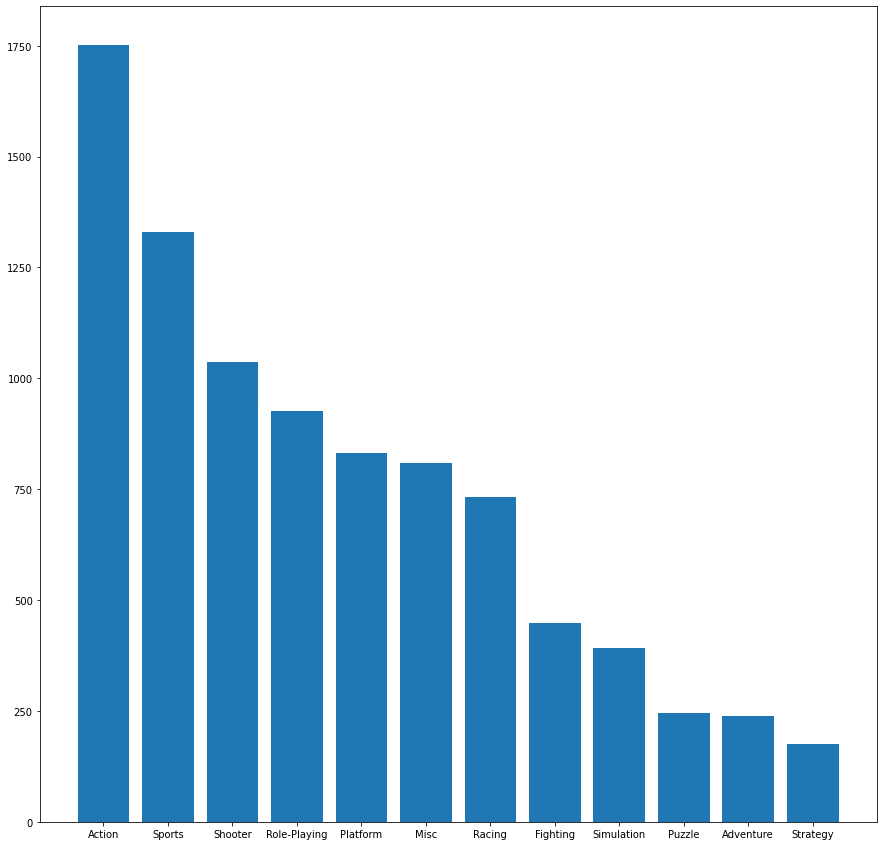

In [57]:
x = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False) # Agrupa los datos por genero y obtiene la suma de las global sales para ese genero
plt.figure(figsize=(15,15))
plt.bar(x.index, x)
plt.show()

In [64]:
df = df.dropna()
df['Year'] = df['Year'].astype(int)

# Respondiendo la primera pregunta

# Pregunta 1

region = ['NA_Sales', 'EU_Sales', 'JP_Sales']
variables = ['Platform', 'Genre', 'Publisher']

for i in region:
  for j in variables:
    k = df.groupby(j)[i].sum().sort_values(ascending=False).head(1)
    print(k)



Platform
X360    594.33
Name: NA_Sales, dtype: float64
Genre
Action    861.77
Name: NA_Sales, dtype: float64
Publisher
Nintendo    815.75
Name: NA_Sales, dtype: float64
Platform
PS3    340.47
Name: EU_Sales, dtype: float64
Genre
Action    516.48
Name: EU_Sales, dtype: float64
Publisher
Nintendo    418.3
Name: EU_Sales, dtype: float64
Platform
DS    175.02
Name: JP_Sales, dtype: float64
Genre
Role-Playing    350.29
Name: JP_Sales, dtype: float64
Publisher
Nintendo    454.99
Name: JP_Sales, dtype: float64


In [68]:
#Pregunta 2 Juego mas popular por region

region = ['NA_Sales', 'EU_Sales', 'JP_Sales']
for i in region:
  k = df.groupby('Name')[i].sum().sort_values(ascending=False).head(1)
  print(k)

Name
Wii Sports    41.49
Name: NA_Sales, dtype: float64
Name
Wii Sports    29.02
Name: EU_Sales, dtype: float64
Name
Pokemon Red/Pokemon Blue    10.22
Name: JP_Sales, dtype: float64


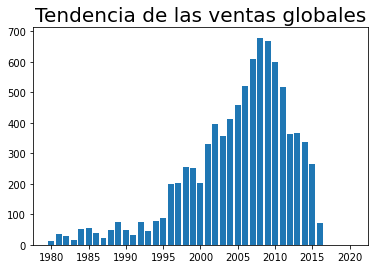

In [76]:
# Pregunta 3 Tendencia en el tiempo de las ventas a nivel global

y = df.groupby('Year')['Global_Sales'].sum()
plt.figure()
plt.title('Tendencia de las ventas globales', fontdict={'fontsize': 20})
plt.bar(y.index, y)
plt.show()

# La ventas han ido al alza con s peak en el 2010